Reference　

https://www.kaggle.com/abcsds/pokemon


https://www.kaggle.com/ndrewgele/visualizing-pok-mon-stats-with-seaborn

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
sns.set(rc={'figure.figsize':(30,30)})

In [2]:
Type_1 , Type_2 = "Grass" , "Water"

In [3]:
pkmn = pd.read_csv('data/Pokemon.csv')

In [4]:
pkmn = pkmn.drop(['Generation', 'isLegendary'],axis = 1)

In [5]:
pkmn

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,...,Green,True,0.500,Bug,NaN,False,0.30,2.9,255,insectoid


In [6]:
pkmn.mean(axis = 0)

Number              361.000000
Total               417.945908
HP                   68.380028
Attack               75.013870
Defense              70.808599
Sp_Atk               68.737864
Sp_Def               69.291262
Speed                65.714286
hasGender             0.893204
Pr_Male               0.553377
hasMegaEvolution      0.063800
Height_m              1.144979
Weight_kg            56.773370
Catch_Rate          100.246879
dtype: float64

In [7]:
# sns.jointplot(x="HP", y="Weight_kg", data=pkmn ,height=10)

In [8]:
# plt.figure(figsize=(12,10))
# sns.boxplot(data=pkmn)

In [9]:
pkmn = pkmn.drop(['Total','Number',"Body_Style",'Egg_Group_1','Egg_Group_2','hasMegaEvolution','hasGender','Color','Pr_Male'],axis = 1)

# pkmn_d = pkmn.drop(["Defense","Sp_Atk","Sp_Def","Speed", "Height_m",'Weight_kg','Catch_Rate'],axis = 1)


# min-max normalization
pkmn_norm = pkmn.drop(["Name", "Type_1", "Type_2"],axis = 1)
pkmn_norm = (pkmn_norm - pkmn_norm.min()) / (pkmn_norm.max() - pkmn_norm.min())

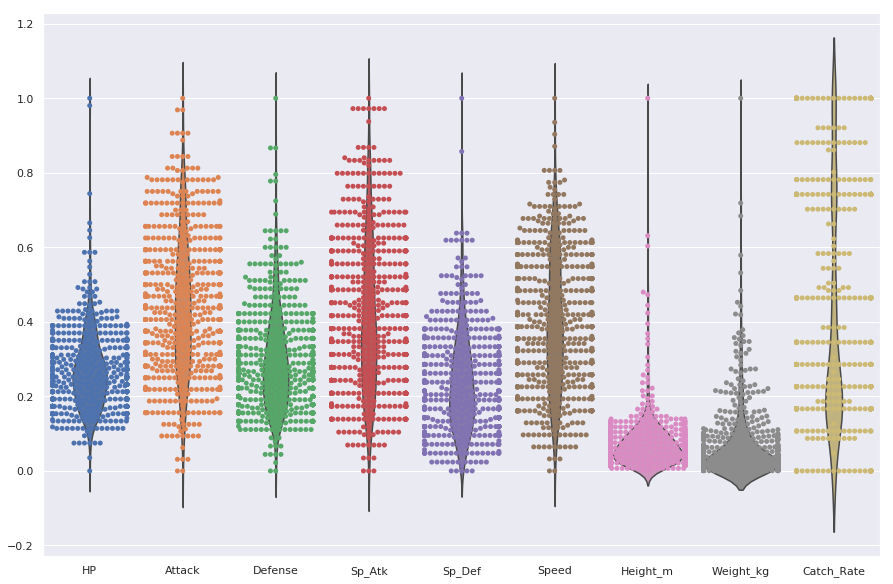

In [10]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(data=pkmn_norm, inner=None)
ax = sns.swarmplot(data=pkmn_norm, edgecolor="gray")

In [11]:
# plt.figure(figsize=(12,10))
# sns.boxplot(data=pkmn_norm)

In [12]:
pkmn = pkmn.drop(['HP','Attack',"Defense",'Sp_Atk','Sp_Def','Speed','Height_m','Weight_kg','Catch_Rate'],axis = 1)

In [13]:
pkmn_norm = pd.concat([pkmn, pkmn_norm], axis=1)
pkmn_norm = pd.melt(pkmn_norm, id_vars=["Name", "Type_1", "Type_2"], var_name="Stat")

/home/takitani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


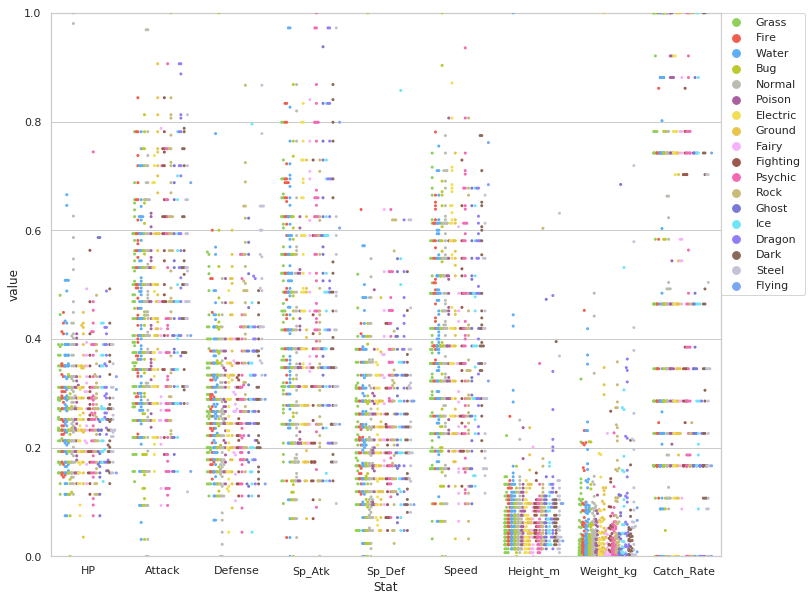

In [14]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 1)
    sns.swarmplot(x="Stat", y="value", data=pkmn_norm, hue="Type_1", split=True, size=3)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

In [15]:

pkmn_norm_Type1 = pkmn_norm[pkmn_norm['Type_1'] == Type_1]
pkmn_norm_Type2 = pkmn_norm[pkmn_norm['Type_1'] == Type_2]
pkmn_norm = pd.concat([pkmn_norm_Type1, pkmn_norm_Type2], axis=0)

/home/takitani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


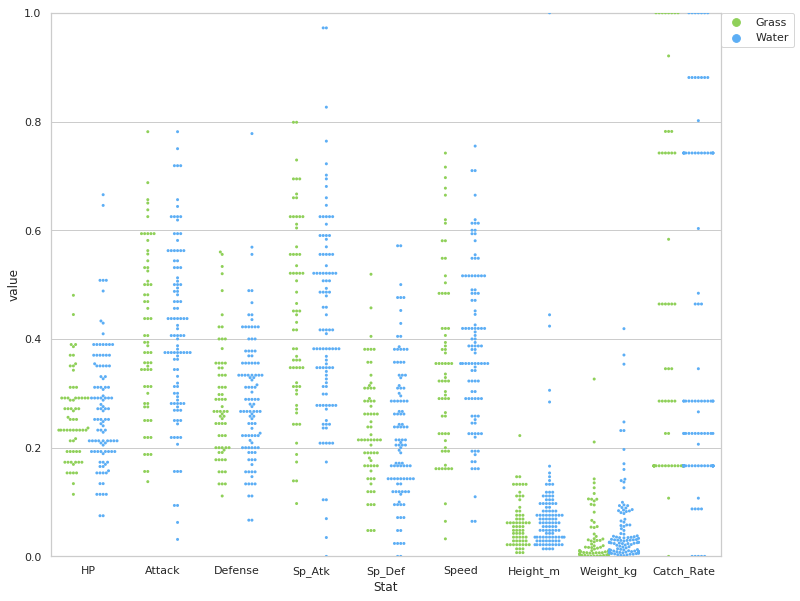

In [16]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752",  "#53AFFE"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 1)
    sns.swarmplot(x="Stat", y="value", data=pkmn_norm, hue="Type_1", split=True, size=3)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)